In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier

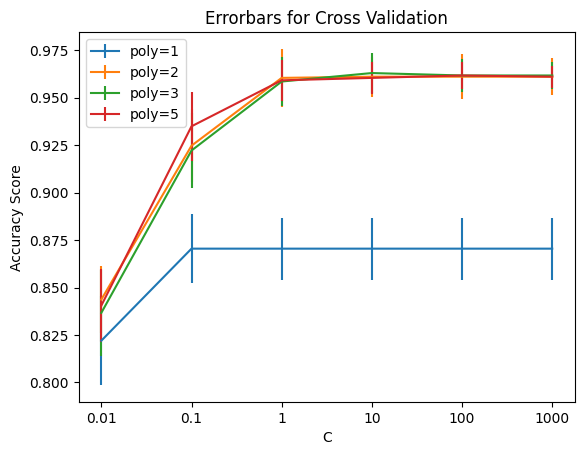

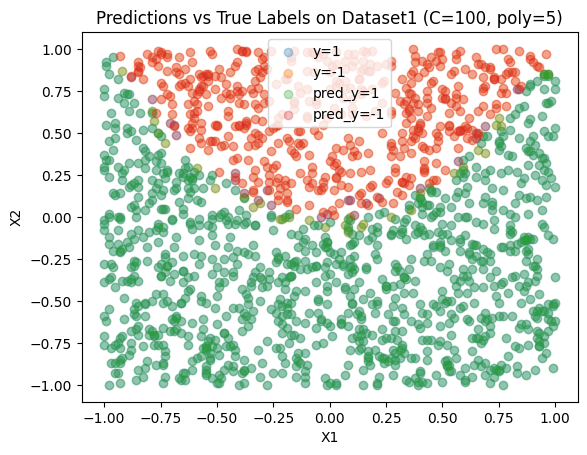

In [3]:
# Question 1
# a) Dataset 1 id:5--10--5-1 ; Dataset 2 id:5-5--5-1 
# Load the dataset
file = open("week4.txt", "r+")
dataset1, dataset2 = [], []
# Which dataset to write in
flag = False

for line in file.readlines():
    if line.strip() == "# id:5--10--5-1":
        continue
    
    # Switch the flag
    if line.strip() == "# id:5-5--5-1":
        flag = True
        continue
        
    # Capture the samples
    sample = np.array(line.strip().split(",")).astype(float)
    if flag:
        dataset1.append(sample)
    else:
        dataset2.append(sample)

# Convert to np type and split X y
dataset1 = np.array(dataset1); dataset2 = np.array(dataset2)
X_1, y_1= dataset1[:, :2], dataset1[:, 2]
index_pos_1 = [i for i in range(len(y_1)) if y_1[i] == 1]; index_neg_1 = [i for i in range(len(y_1)) if y_1[i] == -1]
X_2, y_2 = dataset2[:, :2], dataset2[:, 2]
index_pos_2 = [i for i in range(len(y_2)) if y_2[i] == 1]; index_neg_2 = [i for i in range(len(y_2)) if y_2[i] == -1]

# A search grid
c_list = [0.01, 0.1, 1, 10, 100, 1000]
poly_list = [1, 2, 3, 5]

score_mean, score_std = [], []
for poly in poly_list:
    # Create new features
    poly_X_1 = PolynomialFeatures(poly).fit_transform(X_1)
    means, stds = [], []
    for c in c_list:
        clf = LogisticRegression(random_state=0, penalty='l2', C=c, max_iter=1000)
        scores = []
        # Kfold validation
        for train, test in KFold(5).split(poly_X_1):
            clf.fit(poly_X_1[train], y_1[train])
            ypred = clf.predict(poly_X_1[test])
            scores.append(accuracy_score(y_1[test], ypred))
        # Fetch the mean and std of the scores
        means.append(np.array(scores).mean()), stds.append(np.array(scores).std())
    score_mean.append(means), score_std.append(stds)

# Plot the errorbar
plt.figure()
plt.title("Errorbars for Cross Validation")
for i in range(len(poly_list)):
    plt.errorbar(np.arange(len(c_list)), score_mean[i], score_std[i], label="poly=%d"%poly_list[i])
plt.legend()
plt.xticks(np.arange(len(c_list)), c_list)
plt.xlabel("C"); plt.ylabel("Accuracy Score")
plt.show()

# We select C=100 and poly=5 for the final model
poly_X_1 = PolynomialFeatures(5).fit_transform(X_1)
clf =  LogisticRegression(random_state=0, penalty='l2', C=100, max_iter=1000)
clf.fit(poly_X_1, y_1)
y_pred = clf.predict(poly_X_1)
index_pos_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]; index_neg_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
        
# Plot the first dataset
plt.figure()
plt.title("Predictions vs True Labels on Dataset1 (C=100, poly=5)")
plt.scatter(X_1[index_pos_1][:, 0], X_1[index_pos_1][:, 1], label="y=1", alpha=0.3)
plt.scatter(X_1[index_neg_1][:, 0], X_1[index_neg_1][:, 1], label='y=-1', alpha=0.3)
plt.scatter(X_1[index_pos_pred][:, 0], X_1[index_pos_pred][:, 1], label="pred_y=1", alpha=0.3)
plt.scatter(X_1[index_neg_pred][:, 0], X_1[index_neg_pred][:, 1], label='pred_y=-1', alpha=0.3)
plt.xlabel("X1"), plt.ylabel("X2"), plt.legend()
plt.show()

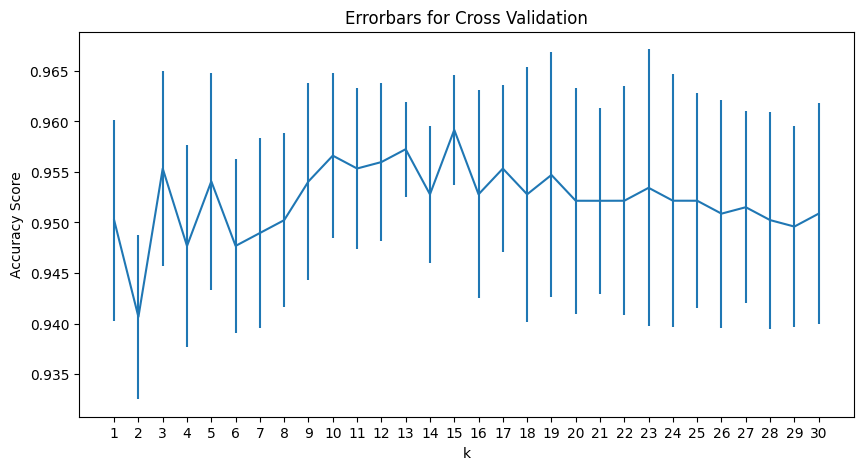

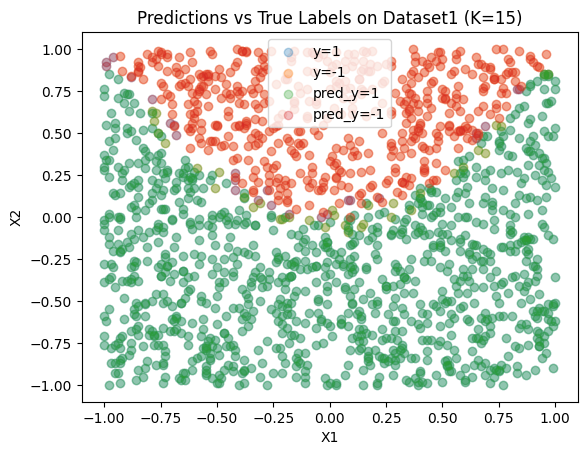

In [4]:
# (b).
k_list = np.arange(30)+1
score_mean, score_std = [], []
for k in k_list:
    # Create classifiers
    scores = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for train, test in KFold(5).split(X_1):
        knn.fit(X_1[train], y_1[train])
        ypred = knn.predict(X_1[test])
        scores.append(accuracy_score(y_1[test], ypred))
        # Fetch the mean and std of the scores
    score_mean.append(np.array(scores).mean()), score_std.append(np.array(scores).std())

# Plot the errorbar
plt.figure(figsize=[10, 5])
plt.title("Errorbars for Cross Validation")
plt.errorbar(np.arange(len(k_list)), score_mean, score_std)
plt.xticks(np.arange(len(k_list)), k_list)
plt.xlabel("k"); plt.ylabel("Accuracy Score")
plt.show()

# We select K=15 for the final model
knn =  KNeighborsClassifier(n_neighbors=15).fit(X_1, y_1)
y_pred = knn.predict(X_1)
index_pos_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]; index_neg_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
        
# Plot the first dataset
plt.figure()
plt.title("Predictions vs True Labels on Dataset1 (K=15)")
plt.scatter(X_1[index_pos_1][:, 0], X_1[index_pos_1][:, 1], label="y=1", alpha=0.3)
plt.scatter(X_1[index_neg_1][:, 0], X_1[index_neg_1][:, 1], label='y=-1', alpha=0.3)
plt.scatter(X_1[index_pos_pred][:, 0], X_1[index_pos_pred][:, 1], label="pred_y=1", alpha=0.3)
plt.scatter(X_1[index_neg_pred][:, 0], X_1[index_neg_pred][:, 1], label='pred_y=-1', alpha=0.3)
plt.xlabel("X1"), plt.ylabel("X2"), plt.legend()
plt.show()

In [5]:
# (c)
# For comparison, a standard logistic classifier is created with the basic features
baseline = LogisticRegression(random_state=0)
baseline.fit(X_1, y_1)
ypred_baseline = baseline.predict(X_1)
print("Confusion matrix for the baseline model: ")
print(confusion_matrix(y_1, ypred_baseline))

# The other two models
poly_X_1 = PolynomialFeatures(5).fit_transform(X_1)
poly =  LogisticRegression(random_state=0, penalty='l2', C=100, max_iter=1000)
poly.fit(poly_X_1, y_1)
y_pred_logistic = poly.predict(poly_X_1)
print("Confusion matrix for the logistic classification model: ")
print(confusion_matrix(y_1, y_pred_logistic))

knn =  KNeighborsClassifier(n_neighbors=15).fit(X_1, y_1)
y_pred_knn = knn.predict(X_1)
print("Confusion matrix for the KNN model: ")
print(confusion_matrix(y_1, y_pred_knn))

Confusion matrix for the baseline model: 
[[410 108]
 [ 96 953]]
Confusion matrix for the logistic classification model: 
[[ 486   32]
 [  25 1024]]
Confusion matrix for the KNN model: 
[[ 483   35]
 [  25 1024]]


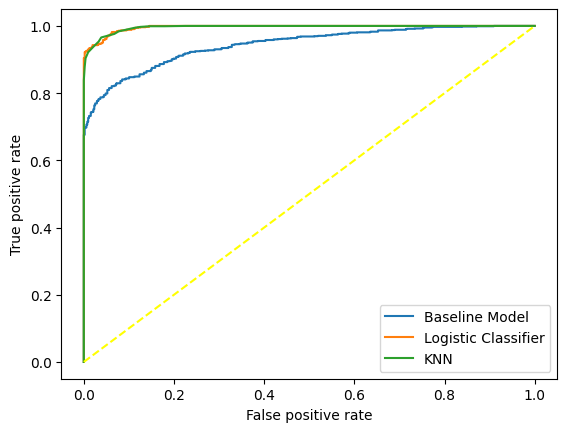

In [6]:
# (d).
# Curves of the models
fpr, tpr, _ = roc_curve(y_1, baseline.decision_function(X_1))
plt.plot(fpr, tpr, label="Baseline Model")
fpr, tpr, _ = roc_curve(y_1, poly.decision_function(poly_X_1))
plt.plot(fpr, tpr, label="Logistic Classifier")
# For KNN, we shall use the probabilities instead
fpr, tpr, _ = roc_curve(y_1, knn.predict_proba(X_1)[:, 1])
plt.plot(fpr, tpr, label="KNN")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.plot([0, 1], [0, 1], color="yellow",linestyle="--")
plt.show()

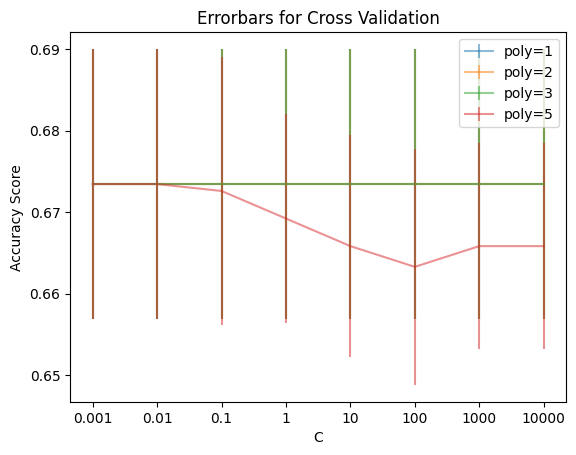

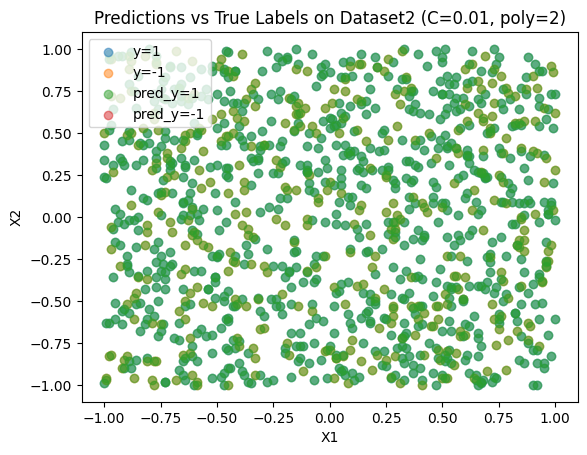

In [7]:
# Question 2
# (a)
# A search grid
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
poly_list = [1, 2, 3, 5]

score_mean, score_std = [], []
for poly in poly_list:
    # Create new features
    poly_X_2 = PolynomialFeatures(poly).fit_transform(X_2)
    means, stds = [], []
    for c in c_list:
        clf = LogisticRegression(random_state=0, penalty='l2', C=c, max_iter=1000)
        scores = []
        # Kfold validation
        for train, test in KFold(5).split(poly_X_2):
            clf.fit(poly_X_2[train], y_2[train])
            ypred = clf.predict(poly_X_2[test])
            scores.append(accuracy_score(y_2[test], ypred))
        # Fetch the mean and std of the scores
        means.append(np.array(scores).mean()), stds.append(np.array(scores).std())
    score_mean.append(means), score_std.append(stds)

# Plot the errorbar
plt.figure()
plt.title("Errorbars for Cross Validation")
for i in range(len(poly_list)):
    plt.errorbar(np.arange(len(c_list)), score_mean[i], score_std[i], label="poly=%d"%poly_list[i], alpha=0.5)
plt.legend()
plt.xticks(np.arange(len(c_list)), c_list)
plt.xlabel("C"); plt.ylabel("Accuracy Score")
plt.show()

# We select C=100 and poly=5 for the final model
poly_X_2 = PolynomialFeatures(2).fit_transform(X_2)
clf =  LogisticRegression(random_state=0, penalty='l2', C=0.01, max_iter=1000)
clf.fit(poly_X_2, y_2)
y_pred = clf.predict(poly_X_2)
index_pos_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]; index_neg_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
        
# Plot the first dataset
plt.figure()
plt.title("Predictions vs True Labels on Dataset2 (C=0.01, poly=2)")
plt.scatter(X_2[index_pos_2][:, 0], X_2[index_pos_2][:, 1], label="y=1", alpha=0.5)
plt.scatter(X_2[index_neg_2][:, 0], X_2[index_neg_2][:, 1], label='y=-1', alpha=0.5)
plt.scatter(X_2[index_pos_pred][:, 0], X_2[index_pos_pred][:, 1], label="pred_y=1", alpha=0.5)
plt.scatter(X_2[index_neg_pred][:, 0], X_2[index_neg_pred][:, 1], label='pred_y=-1', alpha=0.5)
plt.xlabel("X1"), plt.ylabel("X2"), plt.legend()
plt.show()

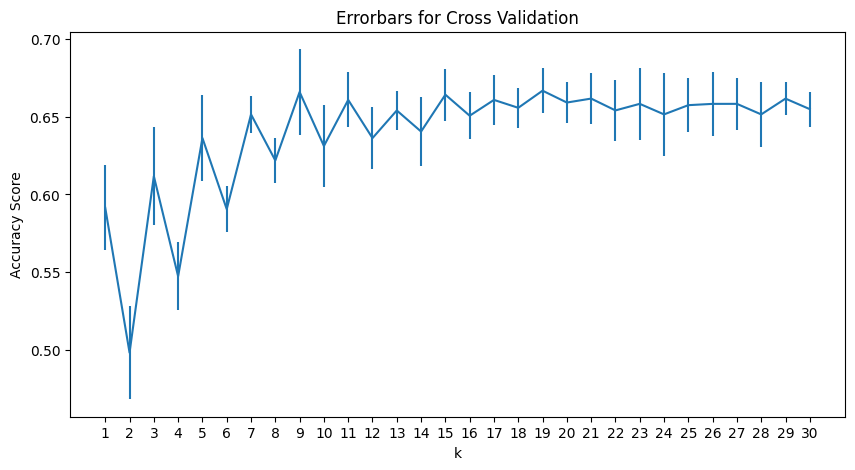

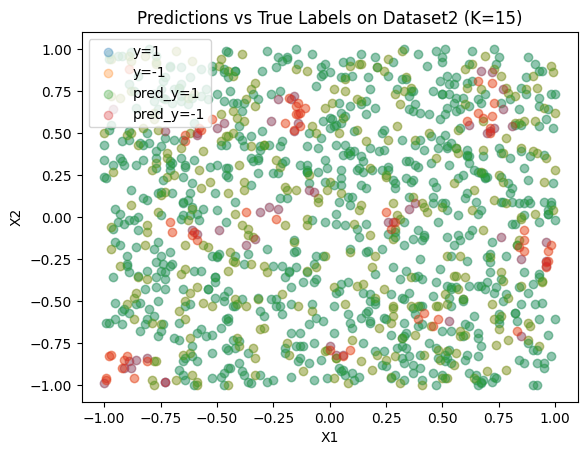

In [8]:
# (b).
k_list = np.arange(30)+1
score_mean, score_std = [], []
for k in k_list:
    # Create classifiers
    scores = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for train, test in KFold(5).split(X_2):
        knn.fit(X_2[train], y_1[train])
        ypred = knn.predict(X_2[test])
        scores.append(accuracy_score(y_1[test], ypred))
        # Fetch the mean and std of the scores
    score_mean.append(np.array(scores).mean()), score_std.append(np.array(scores).std())

# Plot the errorbar
plt.figure(figsize=[10, 5])
plt.title("Errorbars for Cross Validation")
plt.errorbar(np.arange(len(k_list)), score_mean, score_std)
plt.xticks(np.arange(len(k_list)), k_list)
plt.xlabel("k"); plt.ylabel("Accuracy Score")
plt.show()

# We select K=15 for the final model
knn =  KNeighborsClassifier(n_neighbors=15).fit(X_2, y_2)
y_pred = knn.predict(X_2)
index_pos_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]; index_neg_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
        
# Plot the first dataset
plt.figure()
plt.title("Predictions vs True Labels on Dataset2 (K=15)")
plt.scatter(X_2[index_pos_2][:, 0], X_2[index_pos_2][:, 1], label="y=1", alpha=0.3)
plt.scatter(X_2[index_neg_2][:, 0], X_2[index_neg_2][:, 1], label='y=-1', alpha=0.3)
plt.scatter(X_2[index_pos_pred][:, 0], X_2[index_pos_pred][:, 1], label="pred_y=1", alpha=0.3)
plt.scatter(X_2[index_neg_pred][:, 0], X_2[index_neg_pred][:, 1], label='pred_y=-1', alpha=0.3)
plt.xlabel("X1"), plt.ylabel("X2"), plt.legend()
plt.show()

In [9]:
# (c)
# For comparison, a standard logistic classifier is created with the basic features
baseline = LogisticRegression(random_state=0)
baseline.fit(X_2, y_2)
ypred_baseline = baseline.predict(X_2)
print("Confusion matrix for the baseline model: ")
print(confusion_matrix(y_2, ypred_baseline))

# The other two models
poly_X_2 = PolynomialFeatures(2).fit_transform(X_2)
poly =  LogisticRegression(random_state=0, penalty='l2', C=0.01, max_iter=1000)
poly.fit(poly_X_2, y_2)
y_pred_logistic = poly.predict(poly_X_2)
print("Confusion matrix for the logistic classification model: ")
print(confusion_matrix(y_2, y_pred_logistic))

knn =  KNeighborsClassifier(n_neighbors=15).fit(X_2, y_2)
y_pred_knn = knn.predict(X_2)
print("Confusion matrix for the KNN model: ")
print(confusion_matrix(y_2, y_pred_knn))

Confusion matrix for the baseline model: 
[[  0 386]
 [  0 796]]
Confusion matrix for the logistic classification model: 
[[  0 386]
 [  0 796]]
Confusion matrix for the KNN model: 
[[ 61 325]
 [ 53 743]]


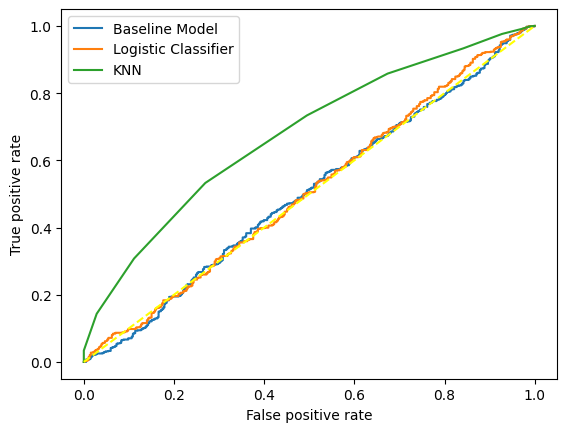

In [10]:
# (d).
# Curves of the models
fpr, tpr, _ = roc_curve(y_2, baseline.decision_function(X_2))
plt.plot(fpr, tpr, label="Baseline Model")
fpr, tpr, _ = roc_curve(y_2, poly.decision_function(poly_X_2))
plt.plot(fpr, tpr, label="Logistic Classifier")
# For KNN, we shall use the probabilities instead
fpr, tpr, _ = roc_curve(y_2, knn.predict_proba(X_2)[:, 1])
plt.plot(fpr, tpr, label="KNN")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.plot([0, 1], [0, 1], color="yellow",linestyle="--")
plt.show()